### Importação da base de dados

In [ ]:
#Importação de bibliotecas para estruturar os dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Fazendo a importação do arquivo
url = 'datatran2020.csv'

In [ ]:
#Aplicando separadores para abrir o arquivo
dtran = pd.read_csv(url, sep=';',encoding='utf-8', thousands='.', decimal=',')    

In [ ]:
#Leitura do arquivo csv
dtran.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta,01:00:00,TO,153.0,678.1,GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Não,5,0,0,5,0,0,5,1,-11.774602,-49.107450,SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta,01:00:00,RJ,116.0,178.0,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,-22.752230,-43.437910,SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta,01:52:00,SC,101.0,206.9,SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,-27.591935,-48.618246,SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta,01:15:00,RO,364.0,236.0,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,1,0,0,1,0,0,1,1,-11.446246,-61.437612,SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta,01:30:00,PR,153.0,360.0,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Simples,Curva,Não,6,0,2,4,0,0,6,1,-25.675038,-50.750898,SR-PR,DEL7/3,UOP04/PR


In [ ]:
dtran.shape

(63530, 30)

### Preparação da base de dados

In [ ]:
#Informação sobre o DataFrame            
dtran.info()                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63530 entries, 0 to 63529
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63530 non-null  float64
 1   data_inversa            63530 non-null  object 
 2   dia_semana              63530 non-null  object 
 3   horario                 63530 non-null  object 
 4   uf                      63530 non-null  object 
 5   br                      63372 non-null  float64
 6   km                      63372 non-null  float64
 7   municipio               63530 non-null  object 
 8   causa_acidente          63530 non-null  object 
 9   tipo_acidente           63530 non-null  object 
 10  classificacao_acidente  63530 non-null  object 
 11  fase_dia                63530 non-null  object 
 12  sentido_via             63530 non-null  object 
 13  condicao_metereologica  63530 non-null  object 
 14  tipo_pista              63530 non-null

In [ ]:
#Identificação de número de valores ausentes/nulos 
dtran.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        158
km                        158
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
uop                       399
dtype: int64

In [ ]:
#Dropar colunas                      
dtran=dtran.drop(['uop'], axis=1)

In [ ]:
#Limpando dados nulos
dtran.dropna(inplace=True)

In [ ]:
#Verificação do parametro aplicado                    
dtran.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
dtype: int64

In [ ]:
#Todas as colunas apresentam a mesma quantidade de dados   
dtran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63372 entries, 0 to 63529
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63372 non-null  float64
 1   data_inversa            63372 non-null  object 
 2   dia_semana              63372 non-null  object 
 3   horario                 63372 non-null  object 
 4   uf                      63372 non-null  object 
 5   br                      63372 non-null  float64
 6   km                      63372 non-null  float64
 7   municipio               63372 non-null  object 
 8   causa_acidente          63372 non-null  object 
 9   tipo_acidente           63372 non-null  object 
 10  classificacao_acidente  63372 non-null  object 
 11  fase_dia                63372 non-null  object 
 12  sentido_via             63372 non-null  object 
 13  condicao_metereologica  63372 non-null  object 
 14  tipo_pista              63372 non-null

In [ ]:
#Alterando valores em único comando astype para várias colunas dentro do mesmo dicionário
dtran=dtran.astype({'br':'int32'}, {'km':'int32'})

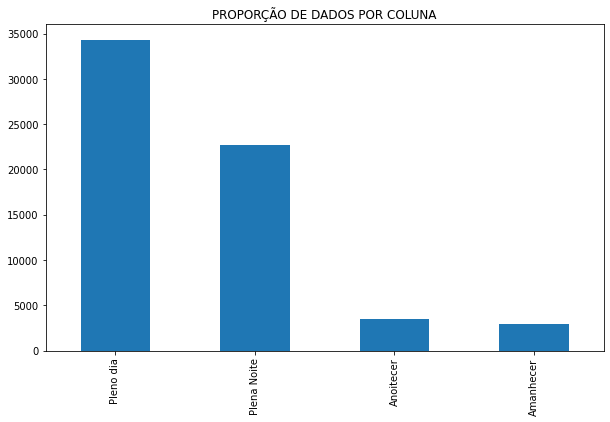

In [ ]:
#Representando cada valor da coluna  
dtran['fase_dia'].value_counts(sort=True).plot.bar(figsize=[10,6],title='PROPORÇÃO DE DADOS POR COLUNA')  

In [ ]:
#Transformando dois valores da coluna em um 
dtran['fase_dia']= dtran['fase_dia'].replace(['Anoitecer', 'Amanhecer'], 'Crepúsculo')

In [ ]:
dtran['fase_dia'].value_counts()

Pleno dia      34293
Plena Noite    22663
Crepúsculo      6416
Name: fase_dia, dtype: int64

## Análise Exploratória dos Dados

In [ ]:
#Estatísticas descritivas
dtran.describe().T

,count,mean,std,min,25%,50%,75%,max
id,63372.0,296476.325759,20943.412005,260031.000000,278453.750000,296536.500000,314537.250000,352488.000000
br,63372.0,212.433693,131.032981,10.000000,101.000000,163.000000,324.000000,495.000000
km,63372.0,261.103295,228.778106,0.000000,78.000000,192.100000,410.000000,1243.000000
pessoas,63372.0,2.323439,1.710675,1.000000,1.000000,2.000000,3.000000,73.000000
mortos,63372.0,0.083381,0.340087,0.000000,0.000000,0.000000,0.000000,13.000000
feridos_leves,63372.0,0.856624,1.009613,0.000000,0.000000,1.000000,1.000000,42.000000
feridos_graves,63372.0,0.269362,0.600242,0.000000,0.000000,0.000000,0.000000,19.000000
ilesos,63372.0,0.956006,1.342449,0.000000,0.000000,1.000000,1.000000,73.000000
ignorados,63372.0,0.158067,0.436417,0.000000,0.000000,0.000000,0.000000,11.000000
feridos,63372.0,1.125986,1.114361,0.000000,1.000000,1.000000,1.000000,44.000000


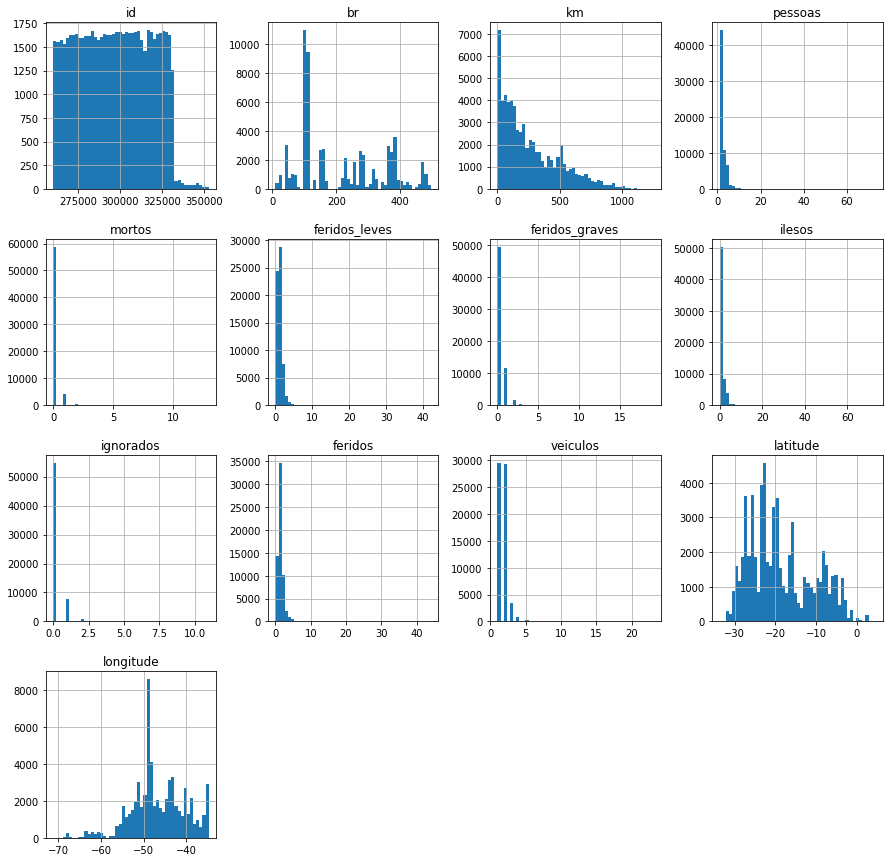

In [ ]:
#Distribuição de valores dos dados númericos  
dtran.hist(bins=50, figsize=(15,15))
plt.show()

In [ ]:
dtran['br'].value_counts()

101    10533
116     9155
381     3031
40      3019
153     2546
       ...  
426        1
265        1
422        1
477        1
352        1
Name: br, Length: 115, dtype: int64

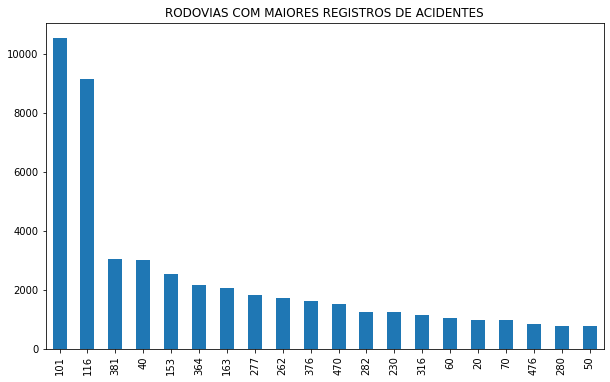

In [ ]:
dtran['br'].value_counts(sort=True)[:20].plot.bar(figsize=[10,6],title='RODOVIAS COM MAIORES REGISTROS DE ACIDENTES')  

In [ ]:
dtran['dia_semana'].value_counts()

sábado     10644
domingo    10396
sexta       9744
segunda     8491
quinta      8219
quarta      8125
terça       7753
Name: dia_semana, dtype: int64

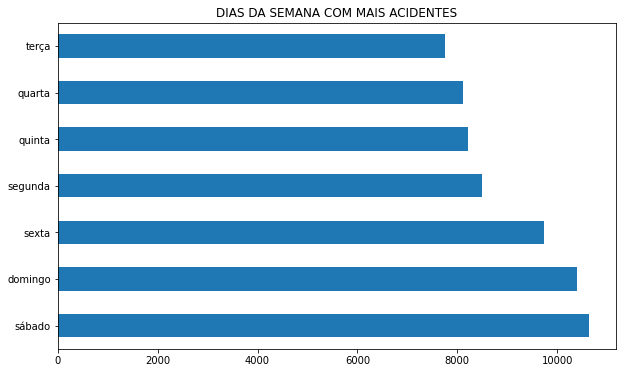

In [ ]:
dtran['dia_semana'].value_counts().plot.barh(figsize=[10,6], title='DIAS DA SEMANA COM MAIS ACIDENTES')

In [ ]:
dtran['uf'].value_counts()

MG    8366
SC    7212
PR    7162
RJ    4222
RS    4166
SP    4030
BA    3446
GO    3217
PE    2551
ES    2533
MT    2188
CE    1569
MS    1534
RO    1480
PB    1396
RN    1332
PI    1198
MA    1152
DF    1036
PA     959
AL     628
TO     590
SE     574
AC     296
RR     247
AP     152
AM     136
Name: uf, dtype: int64

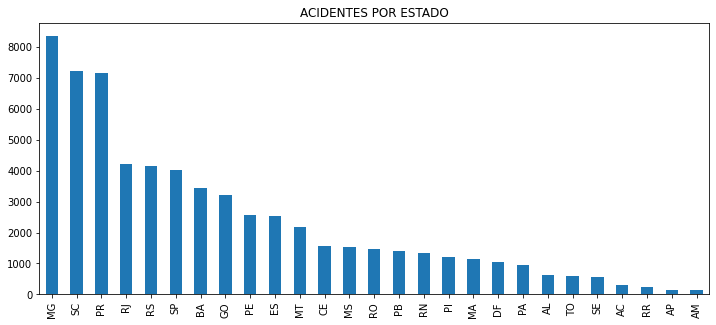

In [ ]:
dtran['uf'].value_counts().plot.bar(figsize=[12,5], title='ACIDENTES POR ESTADO')
#df['uf'].value_counts(normalize=True).plot.bar(figsize=[12,5], title='ACIDENTES POR ESTADO');


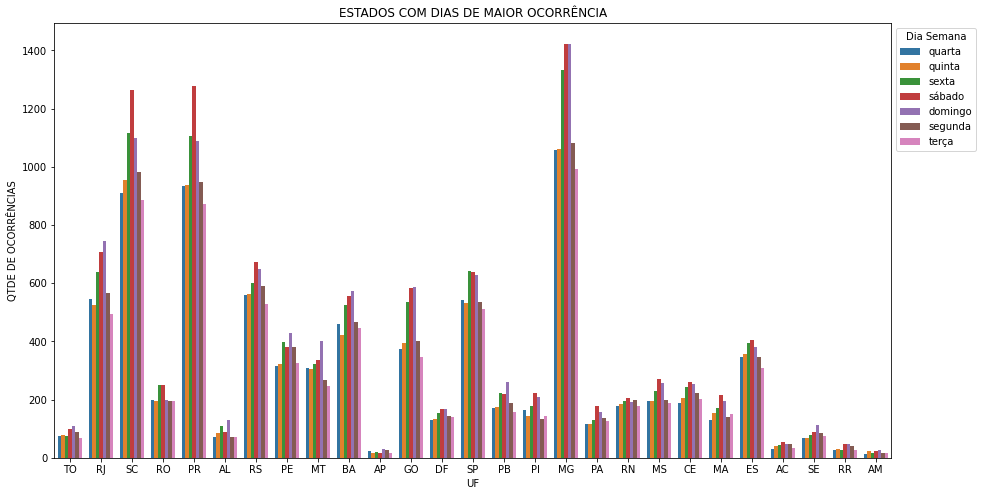

In [ ]:
plt.figure(figsize=(15,8))                                     
ax = sns.countplot(x='uf', hue= 'dia_semana', data=dtran)                    
plt.title('ESTADOS COM DIAS DE MAIOR OCORRÊNCIA')
plt.xlabel('UF', fontsize=10)
plt.ylabel('QTDE DE OCORRÊNCIAS',fontsize=10)
plt.legend(title= 'Dia Semana', title_fontsize= '10', loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
dtran['municipio'].value_counts()

BRASILIA            1036
CURITIBA             946
GUARULHOS            639
SAO JOSE             629
PALHOCA              593
                    ... 
BONITO                 1
APUI                   1
CARIRE                 1
SANTO ANGELO           1
CAMPINA DA LAGOA       1
Name: municipio, Length: 1785, dtype: int64

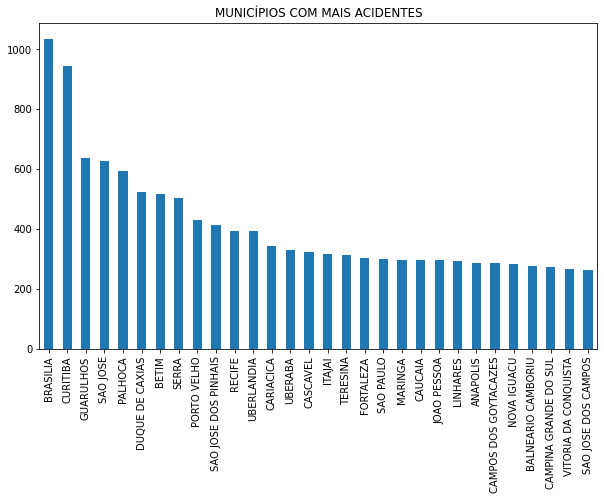

In [ ]:
dtran['municipio'].value_counts(sort=True)[:30].plot.bar(figsize=[10,6],title='MUNICÍPIOS COM MAIS ACIDENTES')   


In [ ]:
dtran['causa_acidente'].value_counts()

Falta de Atenção à Condução                                                       22365
Desobediência às normas de trânsito pelo condutor                                  8776
Velocidade Incompatível                                                            5870
Ingestão de Álcool                                                                 5060
Defeito Mecânico no Veículo                                                        3737
Não guardar distância de segurança                                                 3602
Condutor Dormindo                                                                  2108
Pista Escorregadia                                                                 2008
Falta de Atenção do Pedestre                                                       1640
Animais na Pista                                                                   1406
Ultrapassagem Indevida                                                             1083
Defeito na Via                  

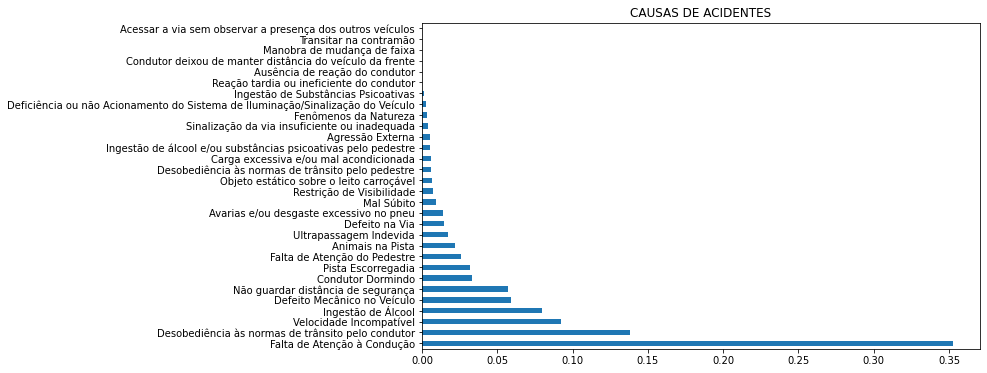

In [ ]:
dtran['causa_acidente'].value_counts(normalize=True)[:30].plot.barh(figsize=[10,6],title='CAUSAS DE ACIDENTES')

In [ ]:
dtran['tipo_acidente'].value_counts()

Colisão traseira                   11434
Saída de leito carroçável          10471
Colisão transversal                 7794
Colisão lateral                     7421
Tombamento                          5556
Colisão com objeto estático         4853
Colisão frontal                     4422
Atropelamento de Pedestre           2833
Queda de ocupante de veículo        2786
Capotamento                         1854
Incêndio                            1176
Atropelamento de Animal             1154
Engavetamento                        898
Colisão com objeto em movimento      253
Danos eventuais                      228
Derramamento de carga                201
Colisão com objeto                    20
Colisão lateral mesmo sentido         10
Colisão lateral sentido oposto         8
Name: tipo_acidente, dtype: int64

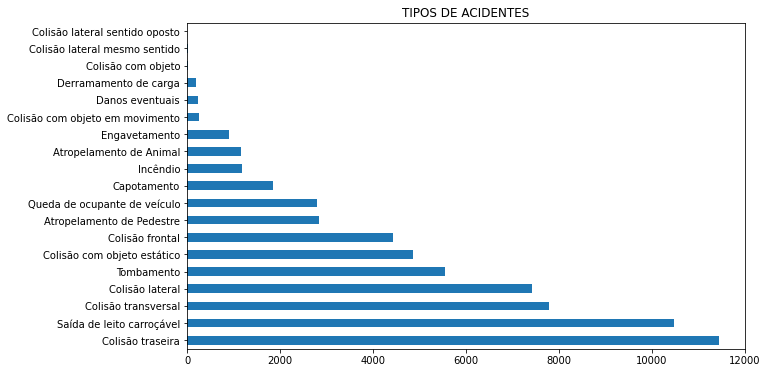

In [ ]:
dtran['tipo_acidente'].value_counts().plot.barh(figsize=[10,6], title='TIPOS DE ACIDENTES')

In [ ]:
dtran['classificacao_acidente'].value_counts()

Com Vítimas Feridas    47338
Sem Vítimas            11517
Com Vítimas Fatais      4517
Name: classificacao_acidente, dtype: int64

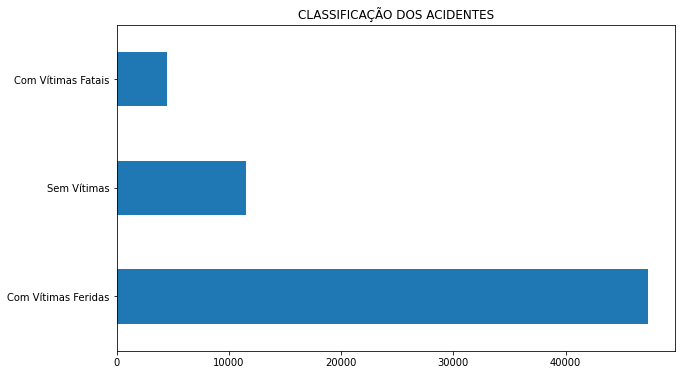

In [ ]:
dtran['classificacao_acidente'].value_counts().plot.barh(figsize=[10,6], title='CLASSIFICAÇÃO DOS ACIDENTES')

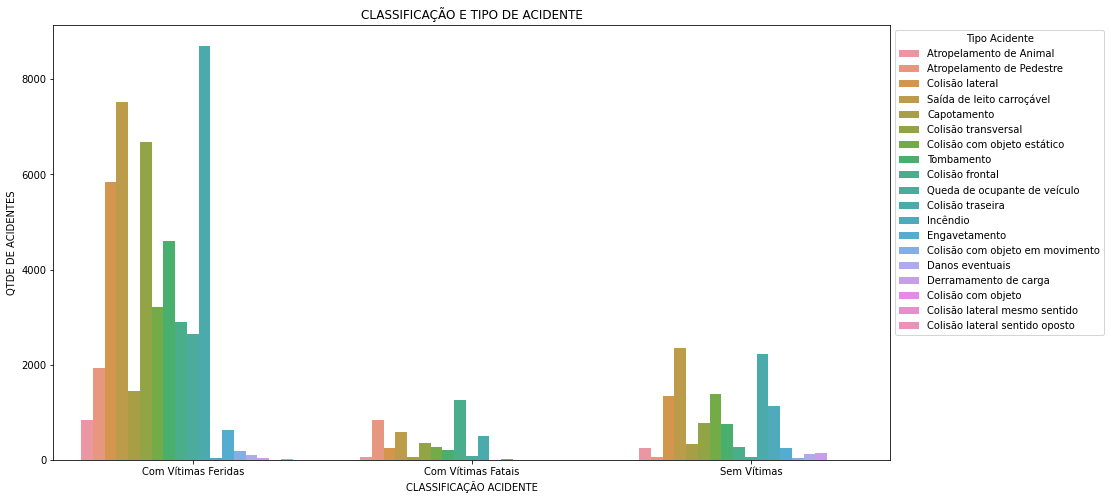

In [ ]:
plt.figure(figsize=(15,8))                                             
ax = sns.countplot(x='classificacao_acidente', hue='tipo_acidente', data=dtran)   
plt.title('CLASSIFICAÇÃO E TIPO DE ACIDENTE')
plt.xlabel('CLASSIFICAÇÃO ACIDENTE', fontsize=10)
plt.ylabel('QTDE DE ACIDENTES',fontsize=10)
plt.legend(title= 'Tipo Acidente', title_fontsize= '10', loc = 2, bbox_to_anchor = (1,1))
plt.show()

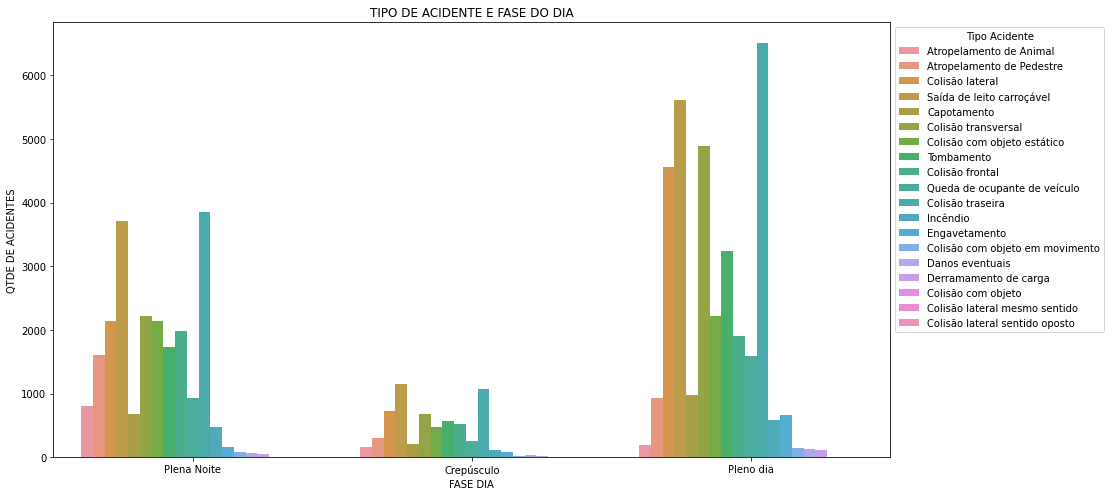

In [ ]:
plt.figure(figsize=(15,8))                                              
ax = sns.countplot(x='fase_dia', hue='tipo_acidente', data=dtran)   
plt.title('TIPO DE ACIDENTE E FASE DO DIA')
plt.xlabel('FASE DIA', fontsize=10)
plt.ylabel('QTDE DE ACIDENTES',fontsize=10)
plt.legend(title= 'Tipo Acidente', title_fontsize= '10', loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
dtran['fase_dia'].value_counts()

Pleno dia      34293
Plena Noite    22663
Crepúsculo      6416
Name: fase_dia, dtype: int64

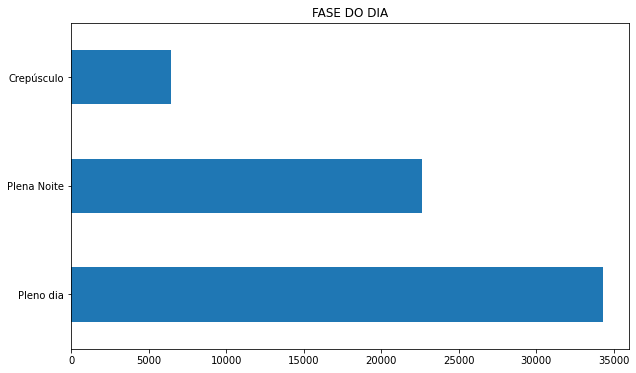

In [ ]:
dtran['fase_dia'].value_counts().plot.barh(figsize=[10,6], title='FASE DO DIA')

In [ ]:
dtran['condicao_metereologica'].value_counts()

Céu Claro           37904
Nublado             10560
Chuva                6803
Sol                  4633
Garoa/Chuvisco       2109
Ignorado              769
Nevoeiro/Neblina      460
Vento                 131
Granizo                 2
Neve                    1
Name: condicao_metereologica, dtype: int64

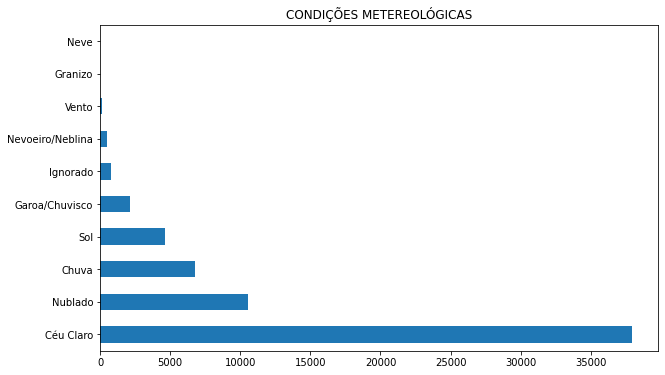

In [ ]:
dtran['condicao_metereologica'].value_counts().plot.barh(figsize=[10,6], title='CONDIÇÕES METEREOLÓGICAS')

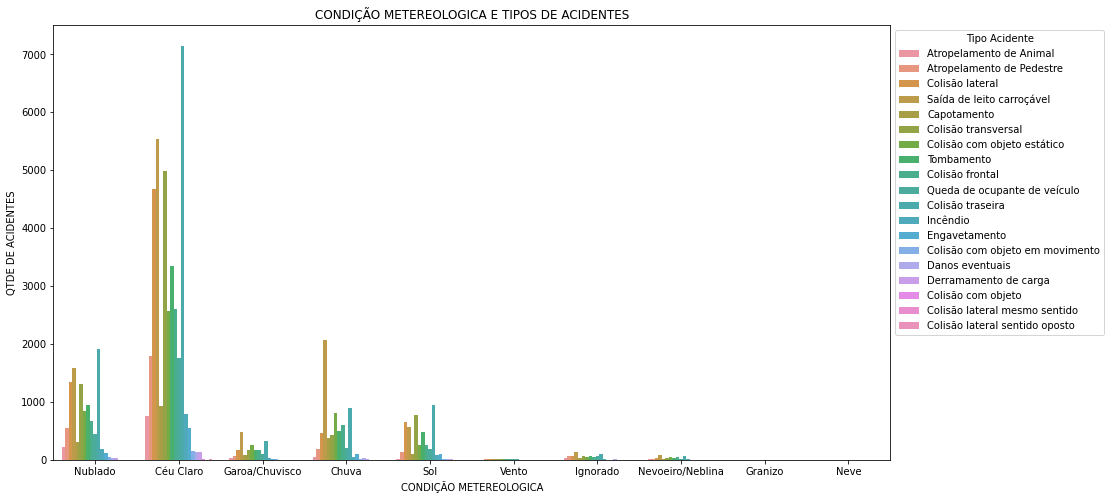

In [ ]:
plt.figure(figsize=(15,8))                                              
ax = sns.countplot(x='condicao_metereologica', hue='tipo_acidente', data=dtran)   
plt.title('CONDIÇÃO METEREOLOGICA E TIPOS DE ACIDENTES')
plt.xlabel('CONDIÇÃO METEREOLOGICA', fontsize=10)
plt.ylabel('QTDE DE ACIDENTES',fontsize=10)
plt.legend(title= 'Tipo Acidente', title_fontsize= '10', loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
dtran['tipo_pista'].value_counts()

Simples     32247
Dupla       26070
Múltipla     5055
Name: tipo_pista, dtype: int64

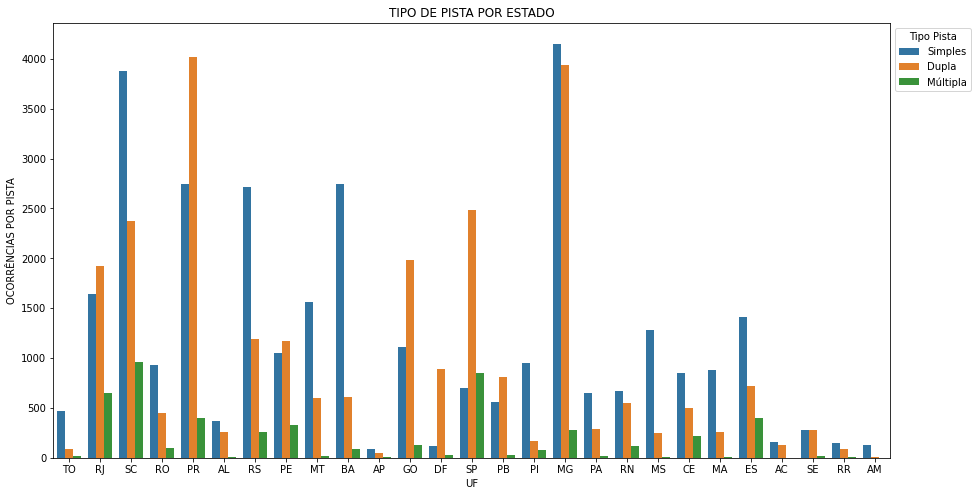

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='uf', hue='tipo_pista', data=dtran)  
plt.title('TIPO DE PISTA POR ESTADO')
plt.xlabel('UF', fontsize=10)
plt.ylabel('OCORRÊNCIAS POR PISTA',fontsize=10)
plt.legend(title= 'Tipo Pista', title_fontsize= '10', loc = 2, bbox_to_anchor = (1,1))
plt.show()


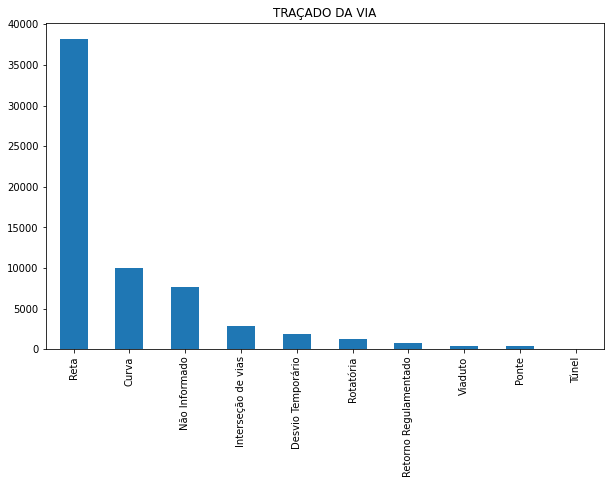

In [ ]:
dtran['tracado_via'].value_counts().plot.bar(figsize=[10,6], title='TRAÇADO DA VIA')

In [ ]:
dtran['uso_solo'].value_counts()

Não    35618
Sim    27754
Name: uso_solo, dtype: int64

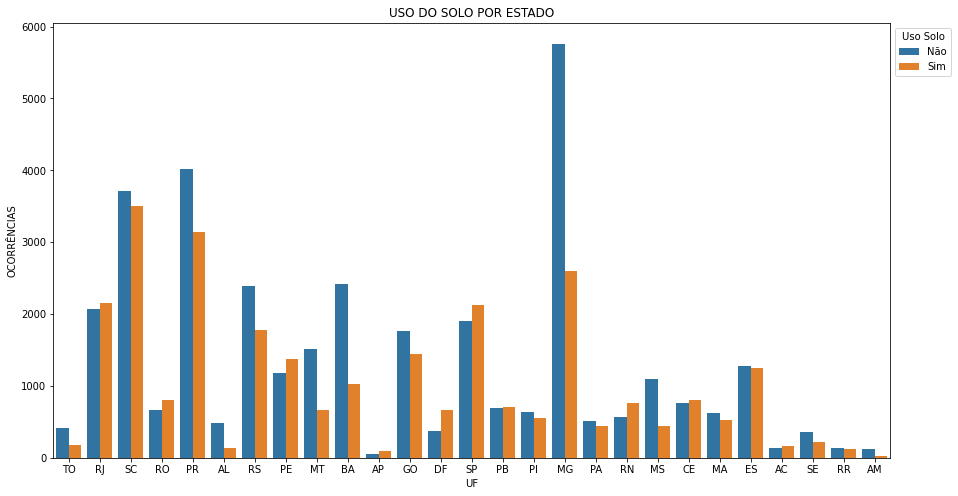

In [ ]:
plt.figure(figsize=(15,8))                                                     
ax = sns.countplot(x='uf', hue='uso_solo', data=dtran)  
plt.title('USO DO SOLO POR ESTADO')
plt.xlabel('UF', fontsize=10)
plt.ylabel('OCORRÊNCIAS',fontsize=10)
plt.legend(title= 'Uso Solo', title_fontsize= '10', loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
#Variáveis correlacionadas
dtran.corr()

,id,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
id,1.000000,-0.007557,0.004820,0.004624,0.019628,-0.021745,0.024228,0.001309,0.015787,-0.006651,0.023372,0.026465,0.015735
br,-0.007557,1.000000,0.036418,0.011114,0.016514,0.004548,0.026523,-0.005688,0.001193,0.018407,0.011011,-0.099201,-0.229949
km,0.004820,0.036418,1.000000,0.013167,0.025520,0.014817,-0.001445,0.007082,-0.022348,0.012646,-0.043528,-0.013057,-0.176591
pessoas,0.004624,0.011114,0.013167,1.000000,0.180508,0.471558,0.258379,0.707778,0.155696,0.566407,0.486946,0.019812,0.002526
mortos,0.019628,0.016514,0.025520,0.180508,1.000000,-0.082514,0.093126,-0.027531,0.075783,-0.024596,0.055261,0.065235,0.026216
feridos_leves,-0.021745,0.004548,0.014817,0.471558,-0.082514,1.000000,-0.113702,-0.047756,-0.097407,0.844757,0.080008,-0.033461,-0.007078
feridos_graves,0.024228,0.026523,-0.001445,0.258379,0.093126,-0.113702,1.000000,-0.063293,0.022578,0.435628,0.080066,0.057490,0.028229
ilesos,0.001309,-0.005688,0.007082,0.707778,-0.027531,-0.047756,-0.063293,1.000000,-0.082724,-0.077359,0.475452,-0.010908,-0.021282
ignorados,0.015787,0.001193,-0.022348,0.155696,0.075783,-0.097407,0.022578,-0.082724,1.000000,-0.076090,0.107937,0.058716,0.032485
feridos,-0.006651,0.018407,0.012646,0.566407,-0.024596,0.844757,0.435628,-0.077359,-0.076090,1.000000,0.115614,0.000651,0.008793


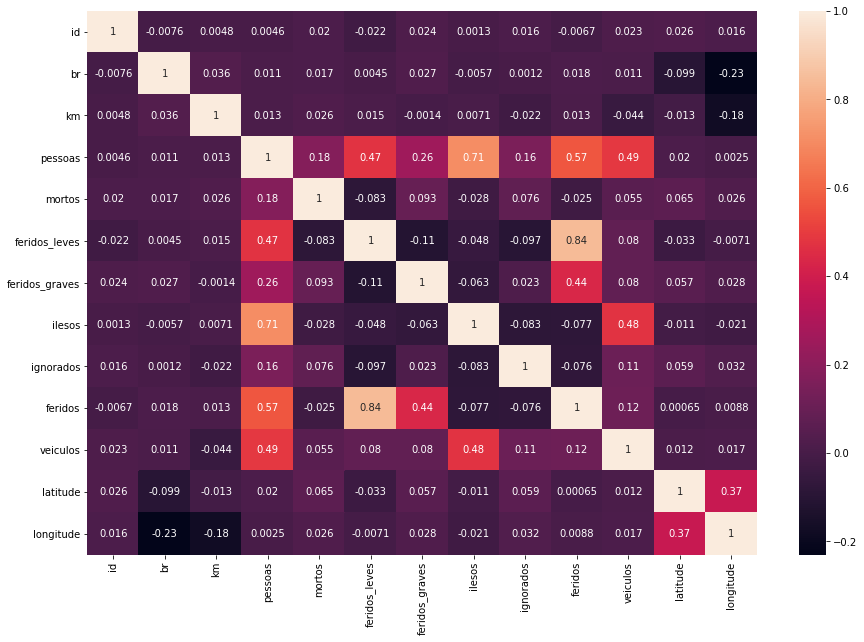

In [ ]:
#Matriz de correlação das variáveis   
plt.figure(figsize=(15,10))
sns.heatmap(dtran.corr(), annot=True)

## Machine Learning

In [ ]:
#Criação do novo df                     
acid = dtran[['br','km','classificacao_acidente','fase_dia','condicao_metereologica','tipo_pista']]
acid

,br,km,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista
0,153,678.1,Com Vítimas Feridas,Plena Noite,Nublado,Simples
1,116,178.0,Com Vítimas Fatais,Plena Noite,Céu Claro,Dupla
2,101,206.9,Com Vítimas Feridas,Plena Noite,Nublado,Simples
3,364,236.0,Com Vítimas Feridas,Plena Noite,Nublado,Simples
4,153,360.0,Com Vítimas Feridas,Plena Noite,Garoa/Chuvisco,Simples
...,...,...,...,...,...,...
63525,101,287.0,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla
63526,364,1071.0,Com Vítimas Fatais,Plena Noite,Nublado,Dupla
63527,116,156.6,Com Vítimas Feridas,Crepúsculo,Céu Claro,Simples
63528,343,20.0,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples


In [ ]:
#Juntando colunas km e br 
acid['local']=acid.apply(lambda x:'%s_%s' % (x['km'],x['br']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
acid = acid.drop(columns=['br','km'])
acid.head()

,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,local
0,Com Vítimas Feridas,Plena Noite,Nublado,Simples,678.1_153
1,Com Vítimas Fatais,Plena Noite,Céu Claro,Dupla,178.0_116
2,Com Vítimas Feridas,Plena Noite,Nublado,Simples,206.9_101
3,Com Vítimas Feridas,Plena Noite,Nublado,Simples,236.0_364
4,Com Vítimas Feridas,Plena Noite,Garoa/Chuvisco,Simples,360.0_153


In [ ]:
#Analisando o conteúdo da coluna
acid.classificacao_acidente

0        Com Vítimas Feridas
1         Com Vítimas Fatais
2        Com Vítimas Feridas
3        Com Vítimas Feridas
4        Com Vítimas Feridas
                ...         
63525    Com Vítimas Feridas
63526     Com Vítimas Fatais
63527    Com Vítimas Feridas
63528    Com Vítimas Feridas
63529    Com Vítimas Feridas
Name: classificacao_acidente, Length: 63372, dtype: object

In [ ]:
#Criando um dicionário para transformar a coluna classificacao_acidente de categórica para numérica
cat_para_id={'Com Vítimas Fatais': 0, 'Com Vítimas Feridas': 1, 'Sem Vítimas': 2}

In [ ]:
#Transformando uma coluna categórica em numérica 
#acid.classificacao_acidente.apply(lambda x:cat_para_id[x])
acid=acid.replace({'classificacao_acidente':cat_para_id})

In [ ]:
#Verificando o número correspondente ao dicionário                  
cat_para_id['Com Vítimas Fatais']

0

In [ ]:
#Analisando o conteúdo da coluna
acid.fase_dia

0        Plena Noite
1        Plena Noite
2        Plena Noite
3        Plena Noite
4        Plena Noite
            ...     
63525    Plena Noite
63526    Plena Noite
63527     Crepúsculo
63528      Pleno dia
63529     Crepúsculo
Name: fase_dia, Length: 63372, dtype: object

In [ ]:
#Criando um dicionário para transformar a coluna fase_dia de categórica para numérica
fas_para_id={'Plena Noite': 0, 'Pleno dia': 1, 'Crepúsculo':2}

In [ ]:
#Transformando uma coluna categórica em numérica 
acid=acid.replace({'fase_dia':fas_para_id})

In [ ]:
#Analisando o conteúdo da coluna
acid.condicao_metereologica

0               Nublado
1             Céu Claro
2               Nublado
3               Nublado
4        Garoa/Chuvisco
              ...      
63525         Céu Claro
63526           Nublado
63527         Céu Claro
63528         Céu Claro
63529         Céu Claro
Name: condicao_metereologica, Length: 63372, dtype: object

In [ ]:
#Criando um dicionário para transformar a coluna condicao_metereologica de categórica para numérica
cond_para_id={'Céu Claro':0,'Nublado':1,'Chuva':2,'Sol':3, 'Garoa/Chuvisco':4,'Ignorado':5,'Nevoeiro/Neblina':6,'Vento':7,'Granizo':8,'Neve':9}

In [ ]:
#Transformando uma coluna categórica em numérica 
acid=acid.replace({'condicao_metereologica':cond_para_id})

In [ ]:
#Analisando o conteúdo da coluna
acid.tipo_pista

0        Simples
1          Dupla
2        Simples
3        Simples
4        Simples
          ...   
63525      Dupla
63526      Dupla
63527    Simples
63528    Simples
63529    Simples
Name: tipo_pista, Length: 63372, dtype: object

In [ ]:
#Criando um dicionário para transformar a coluna classificacao_acidente de categórica para numérica
tip_para_id={'Simples': 0, 'Dupla': 1, 'Múltipla': 2}

In [ ]:
#Transformando uma coluna categórica em numérica 
acid=acid.replace({'tipo_pista':tip_para_id})

In [ ]:
loc = acid.local

In [ ]:
#Transformando os demais valores categóricos em numéricos
labelencorder_loc = LabelEncoder()
labelencorder_loc.fit(loc)

LabelEncoder()

In [ ]:
#Conserva o dataframe anterior
ac = acid.copy()
ac['local']=labelencorder_loc.fit_transform(ac.local)

In [ ]:
ac.head()

,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,local
0,1,0,1,0,28195
1,0,0,0,1,6570
2,1,0,1,0,8594
3,1,0,1,0,10172
4,1,0,4,0,16452


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ac, test_size=0.2, random_state=42, stratify=ac['classificacao_acidente'])

In [ ]:
X_cols = ['fase_dia', 'condicao_metereologica','tipo_pista', 'local']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['classificacao_acidente'], test['classificacao_acidente']

**Random Forest Classifier**

In [ ]:
#Aplicando o modelo RandomForest               
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6180670611439842

In [ ]:
y_proba=rf.predict_proba(X_test)

In [ ]:
y_proba=y_proba[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred = rf.predict_proba(X_test)                        
roc_rf = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(roc_rf)

0.5269417409096752


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6180670611439842

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.10      0.10       903
           1       0.75      0.77      0.76      9468
           2       0.19      0.18      0.19      2304

    accuracy                           0.62     12675
   macro avg       0.35      0.35      0.35     12675
weighted avg       0.61      0.62      0.61     12675



Text(33.0, 0.5, 'Real')

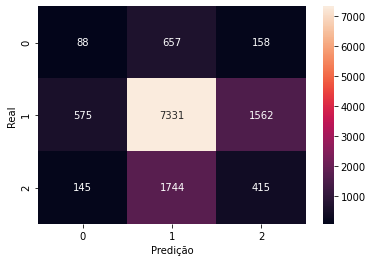

In [ ]:
from sklearn.metrics import confusion_matrix
y_proba = rf.predict(X_test)
cm_rf = confusion_matrix(y_test.values, y_proba, labels=[0,1,2])
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Real')

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred = lr.predict_proba(X_test)                        
roc_lr = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(roc_lr)

0.5376138598253369


In [ ]:
lr.score(X_test, y_test)

0.74698224852071

Text(33.0, 0.5, 'Real')

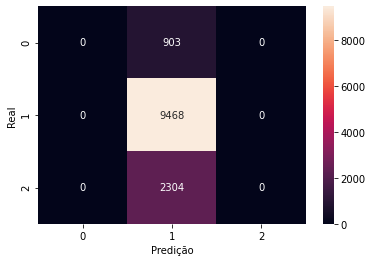

In [ ]:
from sklearn.metrics import confusion_matrix
y_proba = lr.predict(X_test)
cm_lr = confusion_matrix(y_test.values, y_proba, labels=[0,1,2])
sns.heatmap(cm_lr, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Real')

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
y_pred = dtc.predict_proba(X_test)                        
roc_dtc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(roc_dtc)

0.5131908480635247


In [ ]:
dtc.score(X_test, y_test)

0.6166469428007889

Text(33.0, 0.5, 'Real')

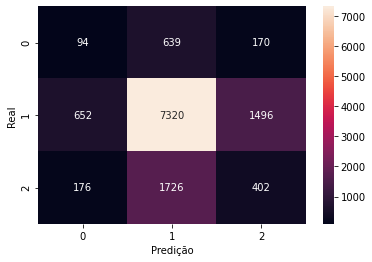

In [ ]:
from sklearn.metrics import confusion_matrix
y_proba = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test.values, y_proba)
sns.heatmap(cm_dtc, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Real')

**KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred = knn.predict_proba(X_test)                        
roc_knn = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(roc_knn)

0.5190259902636826


In [ ]:
knn.score(X_test, y_test)

0.7066666666666667

Text(33.0, 0.5, 'Real')

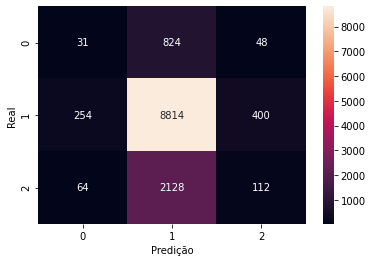

In [ ]:
from sklearn.metrics import confusion_matrix
y_proba = knn.predict(X_test)
cm_knn = confusion_matrix(y_test.values, y_proba)
sns.heatmap(cm_knn, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Real')

**XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred = clf.predict_proba(X_test)                        
roc_clf = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(roc_clf)

0.5853114146274965


In [ ]:
clf.score(X_test, y_test)

0.7469033530571992

Text(33.0, 0.5, 'Real')

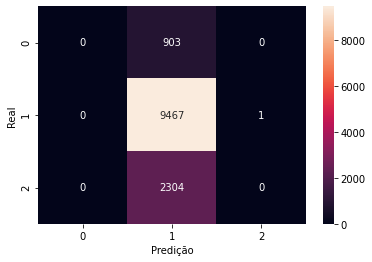

In [ ]:
from sklearn.metrics import confusion_matrix
y_proba = clf.predict(X_test)
cm_clf = confusion_matrix(y_test.values, y_proba)
sns.heatmap(cm_clf, annot=True, fmt='g')
plt.xlabel('Predição')
plt.ylabel('Real')

**Lista de Classificadores**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
lista_classificacores = [RandomForestClassifier(),
                         LogisticRegression(),
                         DecisionTreeClassifier(),
                         KNeighborsClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_train, y_train)

  print('Acuracia')
  train_acc=clf.score(X_train, y_train)
  test_acc=clf.score(X_test, y_test)
  print('Treino:', train_acc)
  print('Teste:', test_acc)  

RandomForestClassifier
Acuracia
Treino: 0.9605696589541788
Teste: 0.6180670611439842
LogisticRegression
Acuracia
Treino: 0.746987001203227
Teste: 0.74698224852071
DecisionTreeClassifier
Acuracia
Treino: 0.9608458094167308
Teste: 0.6171992110453649
KNeighborsClassifier
Acuracia
Treino: 0.7614060003550506
Teste: 0.7066666666666667
XGBClassifier
Acuracia
Treino: 0.7471053514014636
Teste: 0.7469033530571992


**Gráfico de Resultados**

In [ ]:
print(roc_lr, roc_rf, roc_dtc, roc_knn, roc_clf)

0.5376138598253369 0.5269417409096752 0.5131908480635247 0.5190259902636826 0.5853114146274965


In [ ]:
resultado = {
    "Regressão Logistica": (roc_lr *100),
    "Random Forest": (roc_rf *100),
    "Decision Tree": (roc_dtc *100),
    "KNN": (roc_knn *100),
    "XGBClassifier": (roc_clf *100)
}

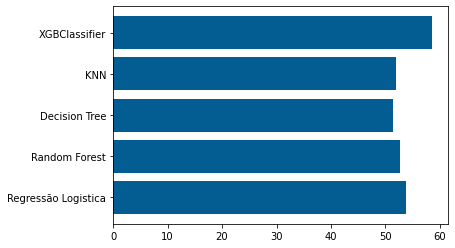

In [ ]:
import matplotlib.pyplot as plt
sns.set_palette("PuBu_r")

plt.barh(*zip(*resultado.items()))
plt.show()

In [ ]:
resultado

{'Decision Tree': 51.319084806352464,
 'KNN': 51.90259902636826,
 'Random Forest': 52.694174090967515,
 'Regressão Logistica': 53.761385982533696,
 'XGBClassifier': 58.531141462749645}

**Calibrando o modelo**

In [ ]:
#Calibrando o modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBClassifier(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=1, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                          'max_depth': [3, 4, 5, 6, 7, 8],
                          'n_estimators': [50, 100, 200

In [ ]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
reg = gs.best_estimator_

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.746987001203227
Validation score [0.74702645 0.74678975 0.74696728]
Test score 0.74698224852071


************